In [20]:
%pylab inline
import jax.numpy as np
import jax

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['np']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [21]:
points = np.array([[i, np.sin(i / 3.0), np.cos(i / 2)] for i in range(0, 11)])
knots = np.array([0, 0, 0, 0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.0, 1.0, 1.0])

In [22]:
knots.shape

(15,)

In [23]:
knots[6], knots[7]

(DeviceArray(0.4, dtype=float32), DeviceArray(0.5, dtype=float32))

In [24]:
points.shape

(11, 3)

In [25]:
def deBoor(k, x, t, c, p):
    """
    Evaluates S(x).

    Args
    ----
    k: index of knot interval that contains x
    x: position
    t: array of knot positions, needs to be padded as described above
    c: array of control points
    p: degree of B-spline
    """
    d = [c[j + k - p] for j in range(0, p+1)]
    for r in range(1, p+1):
        for j in range(p, r-1, -1):
            alpha = (x - t[j+k-p]) / (t[j+1+k-r] - t[j+k-p])
            d[j] = (1.0 - alpha) * d[j-1] + alpha * d[j]
    return d[p]

In [26]:
# Can we do a vectorized version of that? 
def deBoorVectorized(x, t, c, p):
    """
    Evaluates S(x).

    Args
    ----
    x: position
    t: array of knot positions, needs to be padded as described above
    c: array of control points
    p: degree of B-spline
    """
    k = np.digitize(x, t) -1
    
    d = [c[j + k - p] for j in range(0, p+1)]
    for r in range(1, p+1):
        for j in range(p, r-1, -1):
            alpha = (x - t[j+k-p]) / (t[j+1+k-r] - t[j+k-p])
            d[j] = (1.0 - alpha) * d[j-1] + alpha * d[j]
    return d[p]

In [27]:
deBoor(6, 0.45, knots, points[:,1],  3 )

DeviceArray(0.9791609, dtype=float32)

In [50]:
x = np.linspace(0,1.,100, endpoint=False)
y = deBoorVectorized(x, knots, points[:,1], 3 )

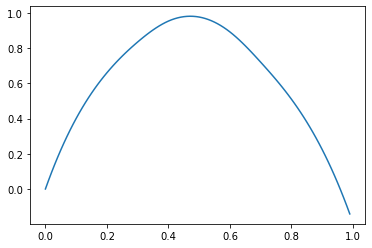

In [51]:
plot(x, y)

In [48]:
y

DeviceArray([-0.29050553, -0.27947316, -0.26844993, -0.25743592,
             -0.24643147, -0.23543692, -0.22445258, -0.21347857,
             -0.20251524, -0.19156304,  0.04809087,  0.0987551 ,
              0.14715269,  0.19336149,  0.2374595 ,  0.2795245 ,
              0.31963444,  0.3578673 ,  0.39430076,  0.4290129 ,
              0.4620815 ,  0.49358463,  0.5236001 ,  0.5522057 ,
              0.5794795 ,  0.60549927,  0.6303429 ,  0.6540883 ,
              0.6768124 ,  0.69858176,  0.7194569 ,  0.7394991 ,
              0.7587689 ,  0.7773273 ,  0.79523504,  0.812553  ,
              0.829342  ,  0.8456563 ,  0.86146384,  0.87667286,
              0.89118946,  0.9049208 ,  0.91777337,  0.92965364,
              0.94046843,  0.9501243 ,  0.9585306 ,  0.96564156,
              0.9714526 ,  0.97596   ,  0.9791609 ,  0.9810513 ,
              0.98162806,  0.9808876 ,  0.9788266 ,  0.97544175,
              0.9707371 ,  0.96472496,  0.95741785,  0.94882834,
              0.93896925,

In [49]:
x

DeviceArray([-0.1       , -0.089     , -0.07800001, -0.067     ,
             -0.056     , -0.045     , -0.03400001, -0.023     ,
             -0.012     , -0.00100001,  0.01      ,  0.021     ,
              0.032     ,  0.04299999,  0.054     ,  0.06499999,
              0.07599999,  0.087     ,  0.09799999,  0.109     ,
              0.11999998,  0.13099998,  0.14199999,  0.153     ,
              0.164     ,  0.175     ,  0.18599999,  0.19699997,
              0.208     ,  0.21899998,  0.22999997,  0.241     ,
              0.25199997,  0.26299998,  0.274     ,  0.285     ,
              0.29599997,  0.307     ,  0.318     ,  0.329     ,
              0.33999997,  0.35099998,  0.362     ,  0.37299997,
              0.384     ,  0.39499998,  0.406     ,  0.417     ,
              0.428     ,  0.43899998,  0.45      ,  0.461     ,
              0.47199997,  0.48299998,  0.49399996,  0.505     ,
              0.51600003,  0.527     ,  0.538     ,  0.54899997,
              0.55999994,